<h3>CNN: Image classification<h3/>

<br>Importing libraries<br/>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading data

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

Exploring and reshaping data

In [4]:
print("shapes")
print("X_train",X_train.shape,"y_train",y_train.shape)
print("X_test",X_test.shape,"y_test",y_test.shape)

shapes
X_train (50000, 32, 32, 3) y_train (50000, 1)
X_test (10000, 32, 32, 3) y_test (10000, 1)


In [5]:
print("X_train",X_train[1])
print("y_train",y_train[:3])

X_train [[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]
y_train [[6]
 [9]
 [9]]


In [6]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print("y_train",y_train[:3])

y_train [6 9 9]


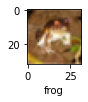

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_image(X, y, index):
    plt.figure(figsize = (1,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_image(X_train, y_train, 0)

Data normalization 

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train",X_train[1])

X_train [[[0.60392157 0.69411765 0.73333333]
  [0.49411765 0.5372549  0.53333333]
  [0.41176471 0.40784314 0.37254902]
  ...
  [0.35686275 0.37254902 0.27843137]
  [0.34117647 0.35294118 0.27843137]
  [0.30980392 0.31764706 0.2745098 ]]

 [[0.54901961 0.62745098 0.6627451 ]
  [0.56862745 0.6        0.60392157]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.37647059 0.38823529 0.30588235]
  [0.30196078 0.31372549 0.24313725]
  [0.27843137 0.28627451 0.23921569]]

 [[0.54901961 0.60784314 0.64313725]
  [0.54509804 0.57254902 0.58431373]
  [0.45098039 0.45098039 0.43921569]
  ...
  [0.30980392 0.32156863 0.25098039]
  [0.26666667 0.2745098  0.21568627]
  [0.2627451  0.27058824 0.21568627]]

 ...

 [[0.68627451 0.65490196 0.65098039]
  [0.61176471 0.60392157 0.62745098]
  [0.60392157 0.62745098 0.66666667]
  ...
  [0.16470588 0.13333333 0.14117647]
  [0.23921569 0.20784314 0.22352941]
  [0.36470588 0.3254902  0.35686275]]

 [[0.64705882 0.60392157 0.50196078]
  [0.61176471 0.59607843 0.50

CNN model

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)
cnn.evaluate(X_test,y_test)

Epoch 1/10
1563/1563 [==============================] - 56s 34ms/step - loss: 1.7612 - accuracy: 0.3429
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1611 - accuracy: 0.5902
Epoch 3/10
1475/1563 [===========================>..] - ETA: 2s - loss: 0.9804 - accuracy: 0.6535

Model evaluation 

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Manual Testing 

In [ ]:
plot_image(X_test, y_test,50)